# Stats: Real and Erroneous Sources of Variability

*Purpose*: Variability is an unavoidable reality of engineering: Physical systems do not behave in identical ways, even under similar circumstances. It is important to draw a distinction between sources of variability that corrupt measurements, and other sources of variability that can genuinely change physical outcomes: real vs erroneous variability. Therefore, we should analyze real and erroneous sources of variability differently---this can lead to more accurate data analysis and more efficient engineering designs.


## Setup


In [1]:
import grama as gr
import numpy as np
DF = gr.Intention()
%matplotlib inline

# Concepts

Let's go over some fundamental concepts.

## Variability

> *Variability* is a form of uncertainty that occurs when repeated measurements from a single chosen scenario exhibit different outcomes.

There are several parts to this definition:

*Different outcomes*

We must have different outcomes for there to be variability. If repeated measurement of the same quantity produce the same value, then there is no variability.

*Repeated measurements*

Variability requires repeated measurements, implying that there must be more than one measurement. Unique events that will never occur again cannot be said to exhibit variability.

*A single chosen scenario*

Variability arises when we focus on a single scenario and take repeated measurements. Different scenarios would logically produce different measurements. We might describe a scenario in terms of detailed qualitative factors (e.g. a particular manufacturing process, a particular machinist) or we may describe a family of scenarios with continuous variables (e.g. a continuum of feed speeds when machining).


Variability is perhaps best understood by way of example; let's take a look at one.


In [2]:
# Dataset of die cast aluminum specimens
from grama.data import df_shewhart
df_shewhart.head()

,specimen,tensile_strength,hardness,density
0,1,29314,53.0,2.666
1,2,34860,70.2,2.708
2,3,36818,84.3,2.865
3,4,30120,55.3,2.627
4,5,34020,78.5,2.581


This is a dataset of measured physical properties for individual specimens of a die cast aluminum. You'll investigate this dataset below.


### __q1__ Make a histogram

Make a histogram of the `tensile_strength` in `df_shewhart`. Answer the questions under *observations* below.

             mu           sd       cov
0  31869.366667  3996.380795  0.125399


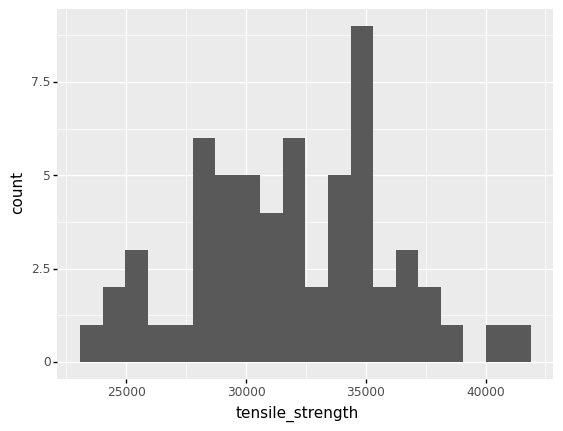

<ggplot: (8766684710437)>

In [3]:
# TASK: Make a histogram
# NOTE: I additionally compute statistics about 
# the observed variability
print(
    df_shewhart
    >> gr.tf_summarize(
        mu=gr.mean(DF.tensile_strength),
        sd=gr.sd(DF.tensile_strength),
    )
    >> gr.tf_mutate(cov=DF.sd/DF.mu)
)
(
    df_shewhart
    >> gr.ggplot(gr.aes("tensile_strength"))
    + gr.geom_histogram(bins=20)
)

*Observations*

- Are all of the measured `tensile_strength` values identical? Do the measurements exhibit *variability*?
  - The measured values are **not** identical; the measurements do exhibit variability.
- How much variability do the `tensile_strength` measurements exhibit? (You can use the histogram, or compute a quantitative summary.)
  - The measurements are *highly* variable; the coefficient of variation is around `0.13`, which is huge for a material property.


## Real vs Erroneous Variability

Variability in engineering applications falls into one of two broad categories:

> *Real variability* is any source of variability that can affect a physical outcome.

> *Error* (or *erroneous variability*) is any source of variability that corrupts a measurement.

Note that errors cannot *directly* affect physical outcomes. A corrupted measurement does not reflect actual changes in the physical quantity one is trying to measure. *However*, making an engineering decision based on corrupted information will lead to a corrupted decision. Errors can only affect the physical world through actions taken based on those errors.

Real and erroneous sources of variability can only be named in a specific context; to that end, let's look at a specific example.


### Example: Manufacturing of Metals

The following image schematically depicts the manufacture and characterization of metallic materials.


![Manufacturing example](./images/manufacturing-examples-numbered.png)
Image credit: Alana Huitric


Variability can enter metals manufacturing at different stages and in different ways:

1. (Real variability) Mistakes during the formulation stage of metals manufacturing can lead to an off-target composition. This will lead to explainable differences in the realized material properties, and will cause the material to not behave as desired.

2. (Real variability) The presence of nicks and cracks in manufactured parts is an unavoidable reality. It is practically impossible to completely eliminate these imperfections. The presence and size of these imperfections will affect the fatigue life of a component. Thus, manufactured parts will tend to exhibit random variability in their fatigue properties.

3. (Error) Material properties are characterized by physical tests, such as tensile tests. Mistakes during testing can occur, such as slippage of the part within the mechanical grips. Such mistakes will lead to explainable differences in the *measured* properties, but cannot directly lead to differences in physical outcomes.

4. (Error) Property measurements typically involve a conversion from mechanical phenomena to electrical signals. However, we tend to take measurements in an electromagnetically dirty environment: Ambient EM interference can induce electrical noise that corrupts a measurement. Since an EM environment is too complex to explain deterministically, this will tend to lead to random differences in measured properties, but this variability cannot directly lead to differences in physical outcomes.


Variability will have different consequences if it is real or erroneous. You will get some practice reasoning through these consequences in the next task.


### __q2__ Consequences of variability

The following depicts the `tensile_strength` measurements, but with an additional vertical line depicting the applied stress from a loading scenario. Imagine that multiple parts will be constructed using the same manufacturing process characterized by the dataset. Answer the questions under *observations* below.

*Note*: Remember that a part fails if its tensile strength is less than an applied stress.


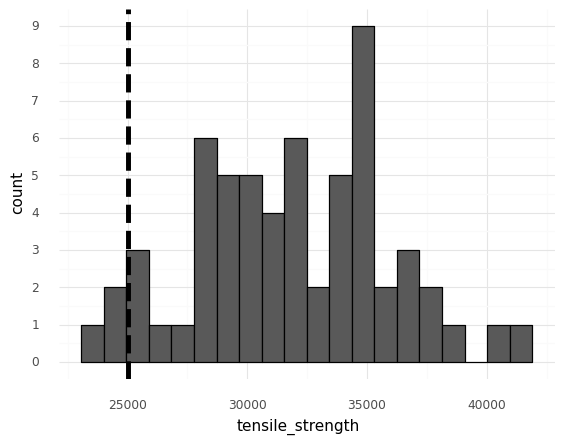

<ggplot: (8766684654641)>

In [4]:
# NOTE: No need to edit; run and inspect
(
    df_shewhart
    >> gr.ggplot(gr.aes("tensile_strength"))
    + gr.geom_histogram(bins=20, color="black")
    + gr.geom_vline(xintercept=25000, linetype="dashed", size=2)
    + gr.scale_y_continuous(breaks=range(0, 10))
    + gr.theme_minimal()
)


*Observations*

Imagine that multiple parts will be constructed using the same manufacturing process characterized by the dataset. The vertical line represents the stress that will be applied to these parts.

- Suppose that the variability depicted above is **purely erroneous**; the tensile strength is actually a fixed constant, and all the observed variability is due to measurement error. How confident would you be that **all** the parts would survive their loading conditions?
  - If the variability were purely error, then the tensile strength is a fixed constant most likely somewhere in the middle of the distribution of measured values. In this case, all of the parts are likely to survive their loading conditions.
- Now suppose that the variability depicted above is **purely real**; the tensile strength varies from part to part. How confident would you be that **all** the parts would survive their loading conditions?
  - If the variability were purely real, then the tensile strength varies with each part. Based on the results above, it is essentially guaranteed that some parts will not survive their loading conditions.
- Which of the two assumptions above would be the most *conservative* assumption to make? Why?
  - Considering the variability as real is a more conservative assumption; this is the less favorable assumption, one which will encourage us to take defensive design measures against possible failures.


## Scenarios

Let's get some practice reasoning with real and erroneous variability. To do so, let's consider the following context:

*The Context*: A manufacturer is producing steel parts for a landing gear. The part in question takes a heavy load, and if it fails it will disable the aircraft on the ground. These parts will be manufactured in bulk; approximately 500 will be made and installed in commercial aircraft that will operate for decades.


### __q3__ Multiple measurements, same part

Imagine the manufacturer selects one part and performs multiple non-destructive tensile tests on that single part, under similar conditions. The measured elasticity from each test is slightly different. Is this variability real or erroneous?

*Questions*

- Is this variability most likely real or erroneous?
  - Erroneous
- Why?
  - The properties of the component are largely set at manufacturing time, and the tests are carried out under similar conditions. If multiple measurements on the same part (under similar conditions) return different values, then the variability is most likely induced by the measurement process---thus, erroneous variability.


### __q4__ Multiple measurements, multiple parts

Imagine the manufacturer selects multiple parts and---for each part---performs multiple non-destructive tensile tests, all under similar conditions. The measured elasticity values for each part are averaged to provide a more reliable estimate for each part. Upon comparing the parts, each averaged value is fairly different. Is this variability real or erroneous?

*Questions*

- Is this variability most likely real or erroneous?
  - Real
- Why?
  - The properties of the component are essentially set at manufacturing time; but no manufacturing process can create items with identical properties. Particularly if variability remains after erroneous variability has been controlled and eliminated (as described in the prompt), then the remaining variability is real.


### __q5__ Single measurements, multiple parts

Now the manufacturer selects multiple parts and performs a destructive tensile test to characterize the strength of each part, with tests carried out under similar conditions. The measured strength values exhibit a fair amount of variability. Is this variability real or erroneous?

*Questions*

- Is this variability most likely real or erroneous?
  - Without more information, it is impossible to say. It is likely a combination of real and erroneous sources.
- Why?
  - Real variability can arise from the manufacturing process, and error can arise from the measurement. Since the measurement is destructive, we cannot use multiple measurements to characterize the erroneous variability.


# Heuristics

Recognizing whether variability is real or erroneous is important for making data analysis choices. The following two heuristics (rules of thumb) will help you make such choices.


## Pure Error: Take the mean

The following is a statistical rule-of-thumb when dealing with variability that is *purely* error:

> (Mean Heuristic) If the observed variability is purely error, then taking the mean of the data will tend to reduce the variability due to error.

```{admonition} Caveat: Bias in measurements
:class: warning
Of course, if the errors are not actually random but insted exhibit *bias*, then taking the mean will not remove these systematic errors. One way to help combat bias is to take truly *independent* measurements; for instance, have different operators take the same measurement, or use two different measurement techniques on the same specimen.
```

### __q6__ Take the mean strength

Compute the mean `tensile_strength`. Answer the questions under *observations* below.


In [5]:
# TASK: Compute the mean tensile_strength
(
    df_shewhart
    >> gr.tf_summarize(
        ts_mean=gr.mean(DF.tensile_strength)
    )
)

,ts_mean
0,31869.366667


*Observations*

Suppose that multiple parts will be made according to the same manufacturing process and subjected to a tensile load. As the parts are currently designed the applied stress will be `26,000` psi, but you are considering whether to redesign the part (to reduce the applied stress).

- Suppose the variability is purely erroneous. Does a redesign seem necessary, based on assuming pure error, the strength value you computed above, and current the applied load?
  - The summarized strength of $\approx31,800$ psi is well above the applied stress of $26,000$ psi. Under the assumption of pure error, redesign does not seem necessary.
- Is the analysis above safe for design purposes? Why or why not?
  - The analysis above is not safe for design; if the assumption of pure error is wrong, then there exists the strong possibility of failure.


## Purely Real: Use quantiles

The following is a statistical rule-of-thumb when dealing with purely real variability:

> (Quantile Heuristic) If the observed variability is purely real, then taking a lower or upper quantile of the data is a reasonable summary.


### __q7__ Compute a quantile of strength

Compute the `0.05` quantile of the `tensile_strength`. Answer the questions under *observations* below.


In [6]:
# TASK: Compute the 0.05 quantile of the tensile_strength
(
    df_shewhart
    >> gr.tf_summarize(
        ts_lo=gr.quant(DF.tensile_strength, p=0.05)
    )
)

,ts_lo
0,25629.0


*Observations*

Suppose that multiple parts will be made according to the same manufacturing process and subjected to a tensile load. As the parts are currently designed the applied stress will be `26,000` psi, but you are considering whether to redesign the part (to reduce the applied stress).

- Suppose the variability is purely real. Does a redesign seem necessary, based on assuming real variability, the strength value you computed above, and current the applied load?
  - The summarized strength is $\approx25,600$ psi, which is a bit below the applied stres of $26,000$ psi. This suggests a redesign is necessary to reduce the applied stress and make the parts safer.
- What probability of failure is associated with your computed strength value?
  - The `0.05` quantile is associated with a probability of failure of $5\%$.
- Is the analysis above safe for design purposes? Why or why not?
  - The analysis above is certainly safer than assuming pure error; it helps us to achieve a desired (small) failure rate.


## Mixed Real and Error: Nested data

In most practical situations, variability is not purely real or purely error; rather, it is mixed. This is a challenging situation, but we can still use the mean and quantile heuristics to guide choices about data analysis.

The following code sets up data collected according to a *nested* collection scheme: Multiple independent measurements are taken on each of multiple specimens.


In [7]:
## NOTE: No need to edit
np.random.seed(101)
# Parameters for data generation
n_sample = 100
n_meas = 8
var_real = 0.20
var_meas = 0.05

# Simulate nested data
df_nested = (
    gr.df_make(
        x=gr.marg_mom("lognorm", floc=0, mean=1, var=var_real).r(n_sample),
        i_sample=range(n_sample),
    )
    >> gr.tf_outer(gr.df_make(i_meas=range(n_meas)))
    >> gr.tf_mutate(
        x_meas=DF.x + gr.marg_mom("norm", mean=0, var=var_meas).r(n_sample*n_meas),
    )
    >> gr.tf_select("i_sample", "i_meas", "x_meas")
    >> gr.tf_arrange(DF.i_sample, DF.i_meas)
)
df_nested.head(8)

,i_sample,i_meas,x_meas
0,0,0,1.042817
1,0,1,0.902662
2,0,2,1.042041
3,0,3,0.870676
4,0,4,1.005482
5,0,5,0.914736
6,0,6,1.111457
7,0,7,1.077125


Here:

- `i_sample` denotes the sample ID, each sample is an independent component
- `i_meas` denotes the measurement ID, measurement are repeated on each sample
  - note that these are per-sample, e.g. `i_meas == 0` for `i_sample == 0` is unrelated to `i_meas == 0` for `i_sample == 1`.
- `x_meas` is the measured value


### __q8__ Identify real and erroneous sources

Inspect the figure below; answer the questions under *observations* below.


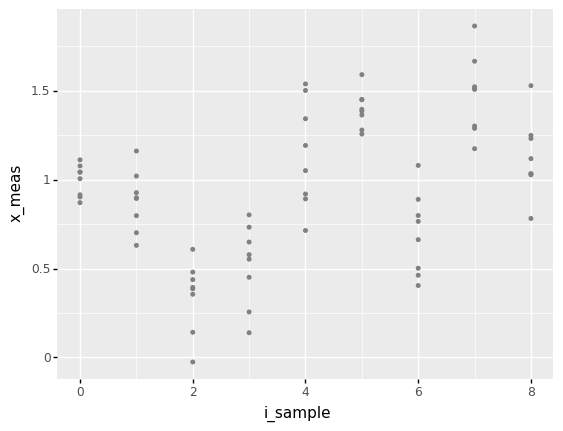

<ggplot: (8766684287618)>

In [8]:
# NOTE: No need to edit; run and inspect
(
    df_nested
    >> gr.tf_filter(DF.i_sample <= 8)
    >> gr.ggplot(gr.aes("i_sample"))
    + gr.geom_point(
        gr.aes(y="x_meas"),
        size=1,
        color="grey",
    )
)

*Observations*

- Is the variability *within* each group of `i_sample` value most likely real or erroneous?
  - This variability is most likely erroneous; these are repeated measurements of the same part.
- Is the variability *across* each group of `i_sample` value most likely real or erroneous?
  - This variability is most likely mixed; we have the same error mentioned in the previous question, plus the variability across each sample.
- Suppose the variability *within* each group of `i_sample` were *purely* erroneous; which heuristic could you apply to each group?
  - The mean heuristic


### __q9__ Apply the mean heuristic

Use the *mean heuristic* to construct a more stable measurement for each sample.

*Hint*: To do this, you will need to `group_by()` an appropriate variable in the data and `summarize()`.


In [9]:
# TASK: Apply the mean heuristic to produce a more stable measurement
# for each sample `x_mean`. Compute the variance within the same
# grouping `var_meas`.
df_nested_mean = (
    df_nested
    >> gr.tf_group_by(DF.i_sample)
    >> gr.tf_summarize(
        x_mean=gr.mean(DF.x_meas),
        var_meas=gr.var(DF.x_meas),
    )
    # Ensure the data are ungrouped after all operations
    >> gr.tf_ungroup()
)

# NOTE: No need to edit; use this to check your results
assert \
    df_nested_mean.shape[0] == n_sample, \
    "Incorrect number of rows; make sure you grouped by the correct variable."
assert \
    "x_mean" in df_nested_mean.columns, \
    "x_mean column not found in result"
assert \
    "var_meas" in df_nested_mean.columns, \
    "var_meas column not found in result"
assert \
    abs(df_nested_mean.x_mean.var() - 0.20) < 0.1, \
    "Sanity check on x_mean failed; did you take the mean?"
    
print("Success!")

Success!


Once you have successfully summarized the data, run the following code and answer the questions under *observations* below.


In [10]:
## NOTE: No need to edit; use this to inspect your results
# This code estimates the variability due to measurement
print(
    df_nested_mean
    >> gr.tf_ungroup()
    >> gr.tf_summarize(
        var_meas=gr.mean(DF.var_meas),
        var_real=gr.var(DF.x_mean),
    )
    >> gr.tf_mutate(var_total=DF.var_meas + DF.var_real)
)

   var_meas  var_real  var_total
0  0.052247  0.169566   0.221813


*Observations*

- About how much variability is due to error?
  - I find that `var_meas ~ 0.05`, which is about $20\%$ of the total.
- About how much variability is real?
  - I find that `var_real ~ 0.20`, which is about $80\%$ of the total.


### Benefits of eliminating erroneous variability

Remember that the mean heuristic helps us reduce erroneous variability; what are the advantages of this technique? Let's compare the nested and summarized datasets:


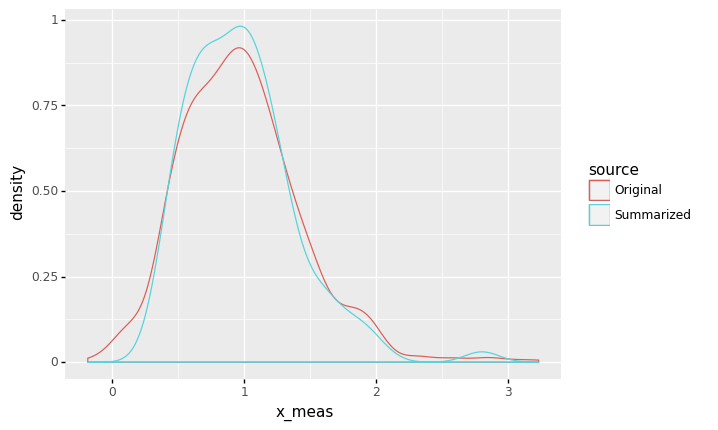

<ggplot: (8766684562905)>

In [11]:
# NOTE: No need to edit; visualize both the original and summarized data
(
    gr.ggplot()
    + gr.geom_density(
        data=df_nested
        >> gr.tf_mutate(source="Original"),
        mapping=gr.aes("x_meas", color="source"),
    )
    + gr.geom_density(
        data=df_nested_mean
        >> gr.tf_mutate(source="Summarized"),
        mapping=gr.aes("x_mean", color="source"),
    )
)

As we might expect, the summarized data appears to be narrower, which would make sense if we had reduced the erroneous variability. This can have useful implications for designs based on our data analysis.


### __q10__ Apply the quantile heuristic

Apply the quantile heuristic to the summarized data. Use the same quantiles `0.10, 0.90` computed on the original data. Answer the questions under *observations* below.

*Hint*: Do you need to group again to apply the quantile heuristic?


In [12]:
# NOTE: No need to edit; this is an analysis of the original data
print("Quantiles of original data")
print(
    df_nested
    >> gr.tf_summarize(
        x_lo=gr.quant(DF.x_meas, 0.10),
        x_hi=gr.quant(DF.x_meas, 0.90),
    )
    # Compute the interval width
    >> gr.tf_mutate(width=DF.x_hi - DF.x_lo)
)

# TASK: Modify the code below
print("\nQuantiles of summarized data")
print(
    df_nested_mean

    >> gr.tf_summarize(
        x_lo=gr.quant(DF.x_mean, 0.10),
        x_hi=gr.quant(DF.x_mean, 0.90),
    )
    # Compute the interval width
    >> gr.tf_mutate(width=DF.x_hi - DF.x_lo)
)

Quantiles of original data
       x_lo      x_hi     width
0  0.444538  1.539972  1.095434

Quantiles of summarized data
       x_lo     x_hi     width
0  0.514268  1.48297  0.968702


*Observations*

- Which interval is narrower (`width`)? The original or the summarized?
  - The summarized data gives a narrower interval.
- How has applying the mean heuristic affected the width of the interval? Why has this happened?
  - Applying the mean heuristic has reduced the width of the interval. This makes sense, as applying the mean heuristic has reduced the variability due to error, allowing us to focus in on the real variability alone.
- Suppose we were using these data to guide engineering design decisions, and a narrower interval would enable a more efficient design. Which analysis would enable a more efficient design?
  - The summarized approach (using the mean and quantile heuristics) would enable a more efficient design.


Note that this kind of analysis is **only** possible when the data have this kind of nested structure; when we have multiple measurements of each specimen. The next task highlights this important fact.


### __q11__ Importance of structured data collection

Inspect the data, and answer the questions under *observations* below.


In [13]:
# NOTE: No need to edit; run and inspect
(
    df_nested
    >> gr.tf_select(DF.x_meas)
    >> gr.tf_head(8)
)

,x_meas
0,1.042817
1,0.902662
2,1.042041
3,0.870676
4,1.005482
5,0.914736
6,1.111457
7,1.077125


*Observations*

- With this form of `df_nested`, could we apply the mean and quantile heuristics to analyze the data? Why or why not?
  - We could not apply the mean and quantile heuristics; this is because we do not have access to information about how the data were collected. Practically, we have no variables to group by.


# Closing punchline

Variability can come in different forms: Real variability affects the outcomes we are interested in, while erroneous variability corrupts measurements and inflates the variability we observe. A careful combination of planned data collection (nested data) and data analysis can help us reduce erroneous variability, which can enable more efficient designs.
